In [1]:
import vitaldb

import numpy as np
from vitabel import Vitals, Channel, Label
from datetime import datetime
from pathlib import Path
import pandas as pd
from collections import defaultdict

In [6]:
filepath = ("/home/gpfs/o_orlob/recto/data/raw/vital_recordings/230113/vitaldb/3nkew3hdk_230113_113659.vital")

In [7]:
vit = vitaldb.VitalFile(str(filepath))

In [8]:
vit.get_track_names()

['GE alt/IBP1',
 'GE alt/IBP2',
 'GE alt/IBP4',
 'GE alt/IBP5',
 'GE alt/IBP6',
 'GE alt/PLETH',
 'GE neu/ECG1',
 'GE neu/HR',
 'GE neu/AMB_PRES',
 'GE alt/HR',
 'GE alt/ART1_SBP',
 'GE alt/ART1_DBP',
 'GE alt/ART1_MBP',
 'GE alt/CVP2',
 'GE alt/PA4_SBP',
 'GE alt/PA4_DBP',
 'GE alt/PA4_MBP',
 'GE alt/PA4_HR',
 'GE alt/ICP6',
 'GE alt/ETCO2_MMHG',
 'GE alt/ETCO2',
 'GE alt/INCO2_MMHG',
 'GE alt/INCO2',
 'GE alt/RR_CO2',
 'GE alt/AMB_PRES',
 'GE alt/FIO2',
 'GE alt/FEO2',
 'GE alt/N2O_FI',
 'GE alt/N2O_ET',
 'GE alt/AGENT_ET',
 'GE alt/AGENT_FI',
 'GE alt/AGENT_MAC',
 'GE alt/RR_VENT',
 'GE alt/PPEAK',
 'GE alt/PEEP',
 'GE alt/CO',
 'GE alt/BT_PA',
 'GE alt/PCWP',
 'GE alt/SPV',
 'GE alt/PPV',
 'GE alt/MAC_AGE',
 'GE alt/ART1_HR']

In [9]:
trk = vit.find_track('GE alt/IBP1')

In [17]:
dt = vit.get_samples(track_names= 'GE alt/IBP1',interval=None,return_datetime=False, return_timestamp=True)

In [18]:
len(dt[0][1])

8341

In [21]:
dt[0][1][2]

'pg'

In [15]:
vit.dtstart

1669196327.6598427

In [27]:
trk = vit.find_track("IBP1")

In [28]:
trk.recs

[{'dt': 1669196328.6327016,
  'val': array([4753, 4667, 4602, 4559, 4559, 4580, 4516, 4430, 4365, 4322, 4279,
         4236, 4215, 4172, 4172, 4172, 4107, 4064, 4000, 4000, 4021, 4000,
         4000, 3957, 3978, 3978, 3957, 3957, 3914, 3957, 4043, 4516, 5871,
         6301, 5656, 5699, 6344, 6688, 6280, 6129, 6323, 6366, 6344, 6301,
         6473, 6538, 6602, 6688, 6731, 7032], dtype=int16)},
 {'dt': 1669196329.1327016,
  'val': array([7075, 6903, 6731, 6645, 6559, 6409, 6258, 6172, 6043, 5892, 5699,
         5484, 5269, 5140, 5226, 5204, 4968, 4817, 4817, 4882, 4860, 4774,
         4796, 4731, 4645, 4624, 4559, 4451, 4344, 4344, 4344, 4301, 4236,
         4193, 4301, 4193, 4021, 4064, 4086, 4021, 4000, 3978, 3978, 3957,
         4021, 4021, 3935, 3914, 3935, 3957], dtype=int16)},
 {'dt': 1669196329.6327016,
  'val': array([3892, 3892, 4258, 5398, 6172, 5656, 5398, 5914, 6301, 6151, 5871,
         5914, 5978, 6021, 6129, 6258, 6473, 6344, 6323, 6602, 6624, 6559,
         6559, 6516, 64

In [ ]:
#

In [23]:
trk.name

'PUMP2_CONC_UNIT'

In [ ]:
self = Vitals()

In [ ]:

from vitaldb.utils import VitalFile, Device

def _track_to_timeseries(vit: VitalFile, track_name: str) -> Channel | Label:
    """Extracts a track from a vitaldb dataset as vitabel channel.

    Parameter
    ---------
    
    """
    def _argb_to_plotstyle(color_int: int):
        if not color_int == 4294967295 and isinstance(color_int, int): #not transparrent white
            a = (color_int >> 24) & 0xFF
            r = (color_int >> 16) & 0xFF
            g = (color_int >> 8) & 0xFF
            b = color_int & 0xFF
            rgba = (r / 255.0, g / 255.0, b / 255.0, a / 255.0)
            return {"color":rgba}
        else:
            return None
    
    if not isinstance(vit, VitalFile):
        raise ValueError("Not a vitals file.")
    if track_name not in vit.get_track_names():
        raise ValueError(f"'{track_name}' is not a track in the given vitals file.")
        
#    (ti, dt), *_ = vit.get_samples(track_names=track_name, interval=1, return_datetime=False, return_timestamp=True)
    trk = vit.trks[track_name]
    
    ti = [entry['dt'] for entry in data]
    dt = [entry['val'] for entry in data]
    
    unix_start = vit.dtstart
    rec_start = datetime.fromtimestamp(unix_start)
    ti = ti - unix_start
    
    trk = vit.find_track(dtname=track_name)
    name = trk.name
    source_name = trk.dname
    metadata = {
        "source" : trk.dname,
        "source_details" : {"source_type" : vit.devs.get(source_name,Device("")).type,
                            "source_port" : vit.devs.get(source_name,Device("")).port},
        "units" : trk.unit,
        "recording_details" : {"sampel_rate" : trk.srate,
                               "offset" : trk.offset,
                               "gain" : trk.gain},
    }
    plotstyle = _argb_to_plotstyle(trk.col)

    if trk.type in {1,2}: # 1: wav, 2: numerical
#        mask = ~pd.isna(dt)
        return Channel(name=name, time_index=ti[mask], data=dt[mask], time_start=rec_start, time_unit="s", plotstyle=plotstyle, metadata=metadata)
    elif trk.type == 5: #str
#        mask = ~pd.isna(dt)
        return Label(name=name, time_index=ti[mask], text_data=dt[mask], time_start=rec_start, time_unit="s", plotstyle=plotstyle, metadata=metadata)

if isinstance(filepath, str):
    filepath = Path(filepath)
if not filepath.exists():
    raise ValueError (f"The path '{filepath}' does not exist.")
vit = vitaldb.VitalFile(str(filepath))

timeseries_list = [_track_to_timeseries(vit, track_name=track_name) for track_name in vit.get_track_names()] # convert all tracks in Channel or Label
labels = []
for ts in timeseries_list:
    if isinstance(ts, Channel):
        self.add_channel(ts)
    elif isinstance(ts, Label):
        labels.append(ts)

# NOTE: the following logic is based on observations not on in depth research of vitaldb source code
# example channel names:'PUMP2_RATE', 'PUMP2_CONC', 'PUMP2_PRES', 'PUMP2_REMAIN', 'PUMP2_VOL',
# corresponding label names: 'PUMP2_DRUG', 'PUMP2_RATE_UNIT','PUMP2_CONC_UNIT'
# rule 1: if qualifier was added and as such the trailing label_name matches a channel_name the label will be attached
# rule 2: for labels not attached by the previous rule, if the trailing label_name string matches several chanel_names substrings it will be attached to each of them
# rule 3: all remaing will be added as global label
split_label_names = {ln: 
    (ln.rsplit('_', 1)[0] if '_' in ln else ln)
    for ln in [label.name for label in labels]
}

split_channel_names = defaultdict(set)
for cn in self.get_channel_names():
    prefix = cn.rsplit('_', 1)[0] if '_' in cn else cn
    split_channel_names[prefix].add(cn)
   
for label in labels: # rule 1
    short_ln = split_label_names[label.name]
    if short_ln in self.get_channel_names():
        label.rename(label.name.rsplit("_",1)[1])
        for channel in self.get_channels(short_ln):
            channel.attach_label(label)
    elif short_ln in split_channel_names: # rule 2
        label.rename(label.name.rsplit("_",1)[1])
        for channel_name in split_channel_names[short_ln]:
            for channel in self.get_channels(channel_name):
                channel.attach_label(label)
    else: # rule 3
        self.add_global_label(label)



In [ ]:
        self,
        filepath: Path | str,
        metadata={"source": "VitalDB-Recording"},
    ) -> None:
        """Loading channels and labels from a vitalDB recording.

        Parameters
        ----------
        filepath
            The path to the recording. Must be a ``*.vit`` file.
        """

        def _track_to_timeseries(vit: VitalFile, track_name: str) -> Channel | Label:
            """Extracts a track from a vitaldb dataset and returns it as channel or label.

            Parameter
            ---------
            vit
                The vitaldb dataset to extract the track from.
            track_name
                The name of the track to extract.   
            """
            def _argb_to_plotstyle(color_int: int):
                '''Converts an ARGB color integer to a plotstyle dictionary with color as rgba.'''
                if not color_int == 4294967295 and isinstance(color_int, int): #not transparrent white
                    a = (color_int >> 24) & 0xFF
                    r = (color_int >> 16) & 0xFF
                    g = (color_int >> 8) & 0xFF
                    b = color_int & 0xFF
                    rgba = (r / 255.0, g / 255.0, b / 255.0, a / 255.0)
                    return {"color":rgba}
                else:
                    return None
            
            if not isinstance(vit, VitalFile):
                raise ValueError("Not a vitals file.")
            if track_name not in vit.get_track_names():
                raise ValueError(f"'{track_name}' is not a track in the given vitals file.")
                
            (ti, dt), *_ = vit.get_samples(track_names=track_name, interval=1, return_datetime=False, return_timestamp=True)
            unix_start = vit.dtstart
            rec_start = datetime.fromtimestamp(unix_start)
            ti = ti - unix_start
            
            trk = vit.find_track(dtname=track_name)
            name = trk.name
            source_name = trk.dname
            metadata = {
                "source" : trk.dname,
                "source_details" : {"source_type" : vit.devs.get(source_name,Device("")).type,
                                    "source_port" : vit.devs.get(source_name,Device("")).port},
                "units" : trk.unit,
                "recording_details" : {"sampel_rate" : trk.srate,
                                    "offset" : trk.offset,
                                    "gain" : trk.gain},
            }
            plotstyle = _argb_to_plotstyle(trk.col)

            if trk.type in {1,2}: # 1: wav, 2: numerical (vitaldb specification)
                mask = ~pd.isna(dt)
                return Channel(name=name, time_index=ti[mask], data=dt[mask], time_start=rec_start, time_unit="s", plotstyle=plotstyle, metadata=metadata)
            elif trk.type == 5: #5: str (vitaldb specification)
                mask = ~pd.isna(dt)
                return Label(name=name, time_index=ti[mask], text_data=dt[mask], time_start=rec_start, time_unit="s", plotstyle=plotstyle, metadata=metadata)

        if isinstance(filepath, str):
            filepath = Path(filepath)
        if not filepath.exists():
            raise ValueError (f"The path '{filepath}' does not exist.")
        vit = vitaldb.VitalFile(str(filepath))

        timeseries_list = [_track_to_timeseries(vit, track_name=track_name) for track_name in vit.get_track_names()] # convert all tracks in Channel or Label
        labels = []
        for ts in timeseries_list:
            if isinstance(ts, Channel):
                self.add_channel(ts)
            elif isinstance(ts, Label):
                labels.append(ts)

        # NOTE: the following logic is based on observations not on in depth research of vitaldb source code
        # example channel names:'PUMP2_RATE', 'PUMP2_CONC', 'PUMP2_PRES', 'PUMP2_REMAIN', 'PUMP2_VOL',
        # corresponding label names: 'PUMP2_DRUG', 'PUMP2_RATE_UNIT','PUMP2_CONC_UNIT'
        # rule 1: if qualifier was added and as such the trailing label_name matches a channel_name the label will be attached
        # rule 2: for labels not attached by the previous rule, if the trailing label_name string matches several chanel_names substrings it will be attached to each of them
        # rule 3: all remaing will be added as global label
        split_label_names = {ln: 
            (ln.rsplit('_', 1)[0] if '_' in ln else ln)
            for ln in [label.name for label in labels]
        }

        split_channel_names = defaultdict(set)
        for cn in self.get_channel_names():
            prefix = cn.rsplit('_', 1)[0] if '_' in cn else cn
            split_channel_names[prefix].add(cn)
        
        for label in labels: # rule 1
            short_ln = split_label_names[label.name]
            if short_ln in self.get_channel_names():
                label.rename(label.name.rsplit("_",1)[1])
                for channel in self.get_channels(short_ln):
                    channel.attach_label(label)
            elif short_ln in split_channel_names: # rule 2
                label.rename(label.name.rsplit("_",1)[1])
                for channel_name in split_channel_names[short_ln]:
                    for channel in self.get_channels(channel_name):
                        channel.attach_label(label)
            else: # rule 3
                self.add_global_label(label)

        self.metadata["Recording_files_added"].append(str(filepath))




In [7]:
self.info()

,Name,Length,First Entry,Last Entry,Offset,source,source_details,units,recording_details,Attached Labels
0,IBP1,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
1,IBP2,13039,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
2,IBP4,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
3,IBP5,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
4,IBP6,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
...,...,...,...,...,...,...,...,...,...,...
61,BT_PA,2618,2022-11-23 10:38:51.659843,2022-11-23 14:16:08.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",C,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",
62,PCWP,2618,2022-11-23 10:38:51.659843,2022-11-23 14:16:08.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",
63,SPV,2618,2022-11-23 10:38:51.659843,2022-11-23 14:16:08.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",%,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",
64,PPV,2618,2022-11-23 10:38:51.659843,2022-11-23 14:16:08.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",%,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",


,Name,Length,First Entry,Last Entry,Offset,source,source_details,units,recording_details,Attached Channel
0,EVENT,10,2022-11-23 11:17:21.659843,2022-11-23 13:44:49.659843,0 days 00:00:00,,"{'source_type': '', 'source_port': ''}",,"{'sampel_rate': 0.0, 'offset': 0.0, 'gain': 1.0}",
1,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
2,UNIT,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
3,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
4,UNIT,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
5,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
6,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
7,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
8,DRUG,5242,2022-11-23 10:38:49.659843,2022-11-23 13:49:59.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP1_REMAIN
9,UNIT,5242,2022-11-23 10:38:49.659843,2022-11-23 13:49:59.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP1_RATE


In [7]:
labels[1].metadata.get("source_details")

{'source_type': 'Agilia', 'source_port': 'COM6'}

In [8]:
label= labels[1]

In [9]:
short_ln = split_label_names[label.name]

KeyError: 'UNIT'

In [ ]:
split_channel_names = defaultdict(set)
for cn in self.get_channel_names():
    prefix = cn.rsplit('_', 1)[0] if '_' in cn else cn
    split_channel_names[prefix].add(cn)


In [ ]:
split_channel_names

In [113]:
label.rename(label.name.rsplit("_",1)[1])

AttributeError: 'Label' object has no attribute 'rename'

In [112]:
label.get_data()

DataSlice(time_index=DatetimeIndex(['2022-11-23 10:38:49.659843', '2022-11-23 10:38:51.659843',
               '2022-11-23 10:38:53.659843', '2022-11-23 10:38:55.659843',
               '2022-11-23 10:38:57.659843', '2022-11-23 10:38:59.659843',
               '2022-11-23 10:39:01.659843', '2022-11-23 10:39:03.659843',
               '2022-11-23 10:39:05.659843', '2022-11-23 10:39:07.659843',
               ...
               '2022-11-23 13:51:32.659843', '2022-11-23 13:51:34.659843',
               '2022-11-23 13:51:36.659843', '2022-11-23 13:51:38.659843',
               '2022-11-23 13:51:40.659843', '2022-11-23 13:51:42.659843',
               '2022-11-23 13:51:44.659843', '2022-11-23 13:51:46.659843',
               '2022-11-23 13:51:48.659843', '2022-11-23 13:51:50.659843'],
              dtype='datetime64[ns]', length=5284, freq=None), data=None, text_data=array(['mL/h', 'mL/h', 'mL/h', ..., 'mL/h', 'mL/h', 'mL/h'],
      shape=(5284,), dtype=object))

In [14]:
self.get_channel_names(metadata={"source_details": labels[1].metadata.get("source_details")})

['PUMP2_RATE',
 'PUMP2_CONC',
 'PUMP2_PRES',
 'PUMP2_REMAIN',
 'PUMP2_VOL',
 'PUMP1_RATE',
 'PUMP1_CONC',
 'PUMP1_PRES',
 'PUMP1_REMAIN',
 'PUMP1_VOL',
 'PUMP3_RATE',
 'PUMP3_CONC',
 'PUMP3_PRES',
 'PUMP3_REMAIN',
 'PUMP3_VOL',
 'PUMP2_RATE',
 'PUMP2_CONC',
 'PUMP2_PRES',
 'PUMP2_REMAIN',
 'PUMP2_VOL',
 'PUMP1_RATE',
 'PUMP1_CONC',
 'PUMP1_PRES',
 'PUMP1_REMAIN',
 'PUMP1_VOL',
 'PUMP3_RATE',
 'PUMP3_CONC',
 'PUMP3_PRES',
 'PUMP3_REMAIN',
 'PUMP3_VOL',
 'PUMP2_RATE',
 'PUMP2_CONC',
 'PUMP2_PRES',
 'PUMP2_REMAIN',
 'PUMP2_VOL',
 'PUMP1_RATE',
 'PUMP1_CONC',
 'PUMP1_PRES',
 'PUMP1_REMAIN',
 'PUMP1_VOL',
 'PUMP3_RATE',
 'PUMP3_CONC',
 'PUMP3_PRES',
 'PUMP3_REMAIN',
 'PUMP3_VOL']

In [100]:
labels

[Label(PUMP2_DRUG),
 Label(PUMP2_RATE_UNIT),
 Label(PUMP2_CONC_UNIT),
 Label(PUMP1_DRUG),
 Label(PUMP1_RATE_UNIT),
 Label(PUMP1_CONC_UNIT),
 Label(PUMP3_DRUG),
 Label(PUMP3_RATE_UNIT),
 Label(PUMP3_CONC_UNIT),
 Label(EVENT)]

In [13]:
for i, label in enumerate(labels):
    print(f"'{label.name}'")

'DRUG'
'UNIT'
'UNIT'
'DRUG'
'UNIT'
'UNIT'
'DRUG'
'UNIT'
'UNIT'
'EVENT'


In [104]:
split_label_names = {ln: 
    (ln.rsplit('_', 1)[0] if '_' in ln else ln)
    for ln in [label.name for label in labels]
}

split_channel_names = defaultdict(list)
for cn in self.get_channel_names():
    prefix = cn.rsplit('_', 1)[0] if '_' in cn else cn
    split_channel_names[prefix].append(cn)




In [95]:
 = { 
    (ln.rsplit('_', 1)[0] if '_' in ln else ln)
    for ln in [label.name for label in labels]
}



{'PUMP2_DRUG': 'PUMP2',
 'PUMP2_RATE_UNIT': 'PUMP2_RATE',
 'PUMP2_CONC_UNIT': 'PUMP2_CONC',
 'PUMP1_DRUG': 'PUMP1',
 'PUMP1_RATE_UNIT': 'PUMP1_RATE',
 'PUMP1_CONC_UNIT': 'PUMP1_CONC',
 'PUMP3_DRUG': 'PUMP3',
 'PUMP3_RATE_UNIT': 'PUMP3_RATE',
 'PUMP3_CONC_UNIT': 'PUMP3_CONC',
 'EVENT': 'EVENT'}

In [99]:
from collections import defaultdict



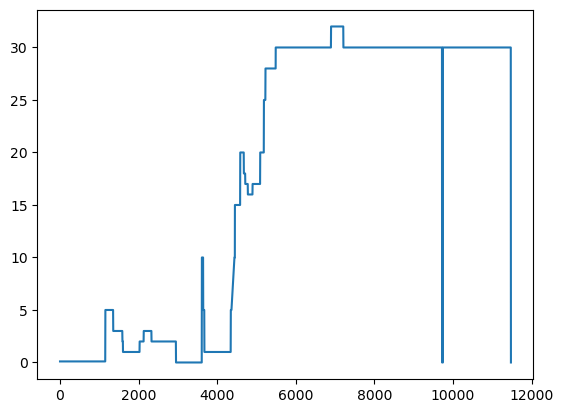

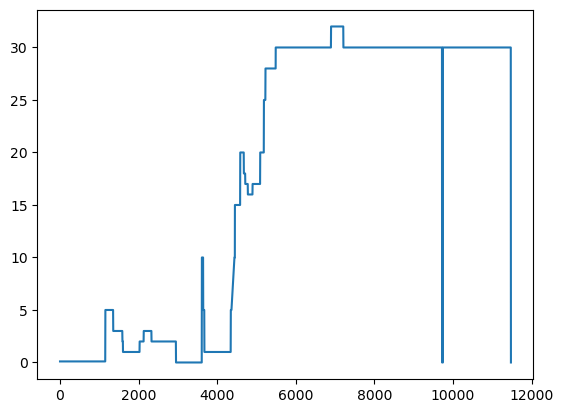

In [87]:
self.get_channel("PUMP1_RATE").plot()


In [56]:
arr=labels[5].get_data().text_data
pd.Series(arr).value_counts()

pg    5242
Name: count, dtype: int64

In [57]:
self.get_channel("Agilia Perfusoren/PUMP2_RATE").get_data()

DataSlice(time_index=DatetimeIndex(['2022-11-23 10:38:49.659843', '2022-11-23 10:38:51.659843',
               '2022-11-23 10:38:53.659843', '2022-11-23 10:38:55.659843',
               '2022-11-23 10:38:57.659843', '2022-11-23 10:38:59.659843',
               '2022-11-23 10:39:01.659843', '2022-11-23 10:39:03.659843',
               '2022-11-23 10:39:05.659843', '2022-11-23 10:39:07.659843',
               ...
               '2022-11-23 13:51:32.659843', '2022-11-23 13:51:34.659843',
               '2022-11-23 13:51:36.659843', '2022-11-23 13:51:38.659843',
               '2022-11-23 13:51:40.659843', '2022-11-23 13:51:42.659843',
               '2022-11-23 13:51:44.659843', '2022-11-23 13:51:46.659843',
               '2022-11-23 13:51:48.659843', '2022-11-23 13:51:50.659843'],
              dtype='datetime64[ns]', length=5284, freq=None), data=array([8., 8., 8., ..., 0., 0., 0.], shape=(5284,), dtype=float32), text_data=None)

In [58]:
case.info()

NameError: name 'case' is not defined

In [59]:
mask= ~pd.isna(case.get_label("Agilia Perfusoren/PUMP2_DRUG").get_data().text_data)

NameError: name 'case' is not defined

In [60]:
case.get_label("Agilia Perfusoren/PUMP2_DRUG").get_data().text_data[mask]

NameError: name 'case' is not defined

In [61]:
vit.devs.get(source_name,Device("")).port

NameError: name 'source_name' is not defined

In [ ]:
type

In [62]:
data = text_data = None

In [63]:
track_name = 'Agilia Perfusoren/PUMP2_RATE_UNIT',

In [64]:
vit.get_samples(track_names=track_name, interval=1, return_datetime=False, return_timestamp=True)

([array([1.66919633e+09, 1.66919633e+09, 1.66919633e+09, ...,
         1.66920937e+09, 1.66920937e+09, 1.66920937e+09], shape=(13048,)),
  array([nan, nan, 'mL/h', ..., nan, nan, nan], shape=(13048,), dtype=object)],
 ['Time', 'Agilia Perfusoren/PUMP2_RATE_UNIT'])

In [10]:
self.info()

,Name,Length,First Entry,Last Entry,Offset,source,source_details,units,recording_details,Attached Labels
0,IBP1,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
1,IBP2,13039,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
2,IBP4,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
3,IBP5,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
4,IBP6,13040,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
5,PLETH,12736,2022-11-23 10:38:48.659843,2022-11-23 14:16:07.659843,0 days 00:00:00,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ...",
6,ECG1,13048,2022-11-23 10:38:47.659843,2022-11-23 14:16:14.659843,0 days 00:00:00,GE neu,"{'source_type': 'Bx50', 'source_port': 'COM5'}",mV,"{'sampel_rate': 300.0, 'offset': 0.0, 'gain': ...",
7,PUMP2_RATE,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}","DRUG, UNIT"
8,PUMP2_CONC,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}","DRUG, UNIT"
9,PUMP2_PRES,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",mmHg,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",DRUG


,Name,Length,First Entry,Last Entry,Offset,source,source_details,units,recording_details,Attached Channel
0,EVENT,10,2022-11-23 11:17:21.659843,2022-11-23 13:44:49.659843,0 days 00:00:00,,"{'source_type': '', 'source_port': ''}",,"{'sampel_rate': 0.0, 'offset': 0.0, 'gain': 1.0}",NaN
1,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
2,UNIT,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_RATE
3,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
4,UNIT,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
5,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
6,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
7,DRUG,5284,2022-11-23 10:38:49.659843,2022-11-23 13:51:50.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP2_CONC
8,DRUG,5242,2022-11-23 10:38:49.659843,2022-11-23 13:49:59.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP1_RATE
9,UNIT,5242,2022-11-23 10:38:49.659843,2022-11-23 13:49:59.659843,0 days 00:00:00,Agilia Perfusoren,"{'source_type': 'Agilia', 'source_port': 'COM6'}",,"{'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}",PUMP1_RATE


In [11]:
label = self.get_label("EVENT")

In [14]:
label.anchored_channel.name

AttributeError: 'NoneType' object has no attribute 'nam'

In [9]:
pd.set_option("display.max_rows", None)


In [7]:
for label in self.get_labels("DRUG"):
    print(label.anchored_channel.name)

PUMP2_CONC
PUMP2_CONC
PUMP2_CONC
PUMP2_CONC
PUMP2_CONC
PUMP1_RATE
PUMP1_RATE
PUMP1_RATE
PUMP1_RATE
PUMP1_RATE
PUMP3_REMAIN
PUMP3_REMAIN
PUMP3_REMAIN
PUMP3_REMAIN
PUMP3_REMAIN


In [11]:
label.attached_channel

AttributeError: 'Label' object has no attribute 'attached_channel'

In [26]:
l.metadata

{'source': 'Agilia Perfusoren',
 'source_details': {'source_type': 'Agilia', 'source_port': 'COM6'},
 'units': '',
 'recording_details': {'sampel_rate': 1.0, 'offset': 0.0, 'gain': 1.0}}

In [ ]:
l

In [3]:
from datetime import datetime

In [2]:
recording_path = Path("data/vital_file.vit")
cardio_object = Vitals()
cardio_object.add_vital_db_recording(recording_path)



In [3]:
cardio_object

In [4]:
cardio_object.info()

,Name,Length,First Entry,Last Entry,Offset,source,source_device,source_details,units,recording_details
0,IBP1,1787,2023-01-11 13:10:37.540275,2023-01-11 13:40:23.540275,0 days 00:00:00,VitalDB-Recording,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",mmHg,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ..."
1,PLETH,1787,2023-01-11 13:10:37.540275,2023-01-11 13:40:23.540275,0 days 00:00:00,VitalDB-Recording,GE alt,"{'source_type': 'Bx50', 'source_port': 'COM9'}",,"{'sampel_rate': 100.0, 'offset': 0.0, 'gain': ..."


,Name,Length,First Entry,Last Entry,Offset
